In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json

## Twitter archive file

In [3]:
# import data
data_archive = pd.read_csv('twitter-archive-enhanced.csv')

# assess the data
display(data_archive.head())
data_archive.info()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Tweet image prediction

In [4]:
# download url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# write into tsv
with open('tweet-image-prediction.tsv',mode = 'wb') as file:
    file.write(response.content)

In [6]:
# read tsv, use tab for sep
data_prediction = pd.read_csv('tweet-image-prediction.tsv',sep = '\t')

# assess the data
display(data_prediction.head())
data_prediction.info()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Tweet API

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = data.tweet_id.values
len(tweet_ids)

NameError: name 'data' is not defined

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [10]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'tweet_ids' is not defined

In [11]:
# read json.text line by line
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))
len(tweets)

2354

In [12]:
# read 'tweets_id','tweets_retweet_count','tweets_favorite_count','tweets_retweeted' from tweets
tweets_id = []
tweets_retweet_count = []
tweets_favorite_count = []
tweets_retweeted = []
for i in range(len(tweets)):
    tweets_id.append(tweets[i]['id'])
    tweets_retweet_count.append(tweets[i]['retweet_count'])
    tweets_favorite_count.append(tweets[i]['favorite_count'])
    tweets_retweeted.append(tweets[i]['retweeted'])

In [13]:
# check the length
print(len(tweets_id))
print(len(tweets_retweet_count))
print(len(tweets_favorite_count))
print(len(tweets_retweeted))

2354
2354
2354
2354


In [14]:
# read into DataFrame
data_json = pd.DataFrame({'id':tweets_id,
                            'retweet_count':tweets_retweet_count,
                            'favorite_count':tweets_favorite_count,
                            'retweeted':tweets_retweeted
                           })

In [15]:
# assess the data
display(data_json.head())
data_json.info()

,id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


## Assess Data

In [ ]:
data_archive
data_prediction
data_json

### Assess Archive data 

In [17]:
display(data_archive.head())
print(data_archive.info())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [90]:
# check duplication
sum(data_archive['tweet_id'].duplicated())

0

In [103]:
# check the rating numerator
print(data_archive.rating_numerator.value_counts())
# get the number of strange numerator 
check_numerator = data_archive.rating_numerator.value_counts().tail(22).index.tolist()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64


In [109]:
# set option to see entire content of the value
pd.set_option('max_colwidth',None)
# print the text of the strange numerator
data_archive[data_archive['rating_numerator'].isin(check_numerator)]['text']

55                                                                                    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
189                                         @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
290                                                                                                                                                            @markhoppus 182/10
313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
433                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and 

#### Issue 1 : Remove line 55,189,290,313,1663 for no image

In [31]:
# check the rating denominator
print(data_archive.rating_denominator.value_counts())
# get the number of strange denominator 
check_denominator = data_archive.rating_denominator.value_counts().tail(17).index.tolist()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


In [37]:
# display the whole values
pd.set_option('max_colwidth',None)
# print the text of the strange denominator
data_archive[data_archive['rating_denominator'].isin(check_denominator)]['text']

313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342                                                                                                                                      @docmisterio account started on 11/15/15
433                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784                                  RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902                                                                                                Why does th

#### Remove line 313,342,1598,1663 for no image
#### Issue 2: Change line 433 for 12/10, 784 for 14/10, remove 516 for no rating, 902 for 11/10, 1068 for 14/10, 1120 for 12/10, 1165 for 13/10,1202 for 11/10, 1228 for 11/10, 1228 for 11/10, 1254 for 10/10, 1274 for 9/10, 1351 for 12/10,1433 for 11/10, 1634 for 11/10, 1635 for 11/10, 1662 for 10/10, 1779 for 12/10, 1843 for 11/10, 2335 9/10.

In [22]:
# check the retweets
data_archive.head()
data_archive[data_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


#### Issue 3: Delete the 181 retweets rows

In [57]:
print(sum(data_archive['in_reply_to_status_id'].isnull()))
print(sum(data_archive['in_reply_to_user_id'].isnull()))

2278
2278


In [58]:
print(data_archive['name'].value_counts())

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Tucker             10
Lola               10
Penny              10
Bo                  9
Winston             9
Sadie               8
the                 8
Buddy               7
Bailey              7
an                  7
Toby                7
Daisy               7
Koda                6
Scout               6
Bella               6
Stanley             6
Rusty               6
Jack                6
Oscar               6
Dave                6
Jax                 6
Milo                6
Leo                 6
Alfie               5
Sunny               5
Gus                 5
Louis               5
Finn                5
Larry               5
very                5
George              5
Chester             5
Oakley              5
Phil                5
Sammy               5
Bentley             5
Chip                4
Sampson             4
Maximus             4
Walter    

#### Issue 4: delete columns with huge missing values and columns that are not useful for analysis

In [47]:
print(data_archive['doggo'].value_counts())
print(data_archive['floofer'].value_counts())
print(data_archive['pupper'].value_counts())
print(data_archive['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


#### Tidiness 1: Melt the four columns of dog type into one column

In [61]:
display(data_archive['timestamp'].head())

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

#### Issue 5: Split the 'timestamp' column into year, month and day three columns

### Assess prediction data 

In [28]:
display(data_prediction.head())
print(data_prediction.info())

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


#### Issue 6: Delete columns that are not used for analysis

In [25]:
# check the duplication of 'tweet_id' column
sum(data_prediction['tweet_id'].duplicated())

0

In [26]:
# check the duplication of 'jpg_url' column
sum(data_prediction['jpg_url'].duplicated())

66

#### Issue 7: drop the 66 repeated rows of 'jpg_url' column

In [49]:
print(data_prediction['p1_dog'].value_counts())
print(data_prediction['p2_dog'].value_counts())
print(data_prediction['p3_dog'].value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [68]:
data_prediction.iloc[6]

tweet_id                                 666051853826850816
jpg_url     https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
img_num                                                   1
p1                                               box_turtle
p1_conf                                            0.933012
p1_dog                                                False
p2                                               mud_turtle
p2_conf                                           0.0458854
p2_dog                                                False
p3                                                 terrapin
p3_conf                                           0.0178853
p3_dog                                                False
Name: 6, dtype: object

#### Issue 8: Create two columns for dog type prediction and cofidence interval since some predictions are not dog

### Assess json data 

In [54]:
display(data_json.head())
print(data_json.info())

,id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB
None


In [51]:
# check for duplication of 'id' column
sum(data_json['id'].duplicated())

0

In [53]:
print(data_json['retweeted'].value_counts())

False    2354
Name: retweeted, dtype: int64


### Problem summary
### Quality
data_archive
<br>
Issue 1: Remove lines for no image
<br>
Issue 2: Correct lines' rating
<br>
Issue 3: Delete the 181 retweets rows
<br>
Issue 4: Delete columns with too many missing values or not useful for analysis
<br>
Issue 5: Split the 'timestamp' column into year, month and day three columns 
<br>
data_prediction
<br>
Issue 6: Delete columns that are not used for analysis
<br>
Issue 7: Drop the 66 repeated rows of 'jpg_url' column
<br>
Issue 8: Create two columns for dog type prediction and cofidence interval since some predictions are not dog
<br>
### Tidiness
Issue 1: Melt the four columns of dog type into one column in archive data
<br>
Issue 2: Merge the three tables

## Clean Data

### Quality

### data archive

Issue 1 : Remove line 55,189,290,313,342,516,1598,1663 for no image

In [230]:
data_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [231]:
data_archive_drop = data_archive.drop([55,189,290,313,342,516,1598,1663],axis = 0)

Issue 2: Change line 433 for 12/10, 784 for 14/10, 902 for 11/10, 1068 for 14/10, 1120 for 12/10, 1165 for 13/10,1202 for 11/10, 1228 for 11/10, 1254 for 10/10, 1274 for 9/10, 1351 for 12/10,1433 for 11/10, 1634 for 11/10, 1635 for 11/10, 1662 for 10/10, 1779 for 12/10, 1843 for 11/10, 2335 9/10.

In [232]:
# change numerator manually
data_archive_drop.iloc[433, data_archive_drop.columns.get_loc('rating_numerator')] = 12
data_archive_drop.iloc[784, data_archive_drop.columns.get_loc('rating_numerator')] = 14
data_archive_drop.iloc[902, data_archive_drop.columns.get_loc('rating_numerator')] = 11
data_archive_drop.iloc[1068, data_archive_drop.columns.get_loc('rating_numerator')] = 14
data_archive_drop.iloc[1120, data_archive_drop.columns.get_loc('rating_numerator')] = 12
data_archive_drop.iloc[1165, data_archive_drop.columns.get_loc('rating_numerator')] = 13
data_archive_drop.iloc[1202, data_archive_drop.columns.get_loc('rating_numerator')] = 11
data_archive_drop.iloc[1228, data_archive_drop.columns.get_loc('rating_numerator')] = 11
data_archive_drop.iloc[1254, data_archive_drop.columns.get_loc('rating_numerator')] = 10
data_archive_drop.iloc[1274, data_archive_drop.columns.get_loc('rating_numerator')] = 9
data_archive_drop.iloc[1351, data_archive_drop.columns.get_loc('rating_numerator')] = 12
data_archive_drop.iloc[1433, data_archive_drop.columns.get_loc('rating_numerator')] = 11
data_archive_drop.iloc[1634, data_archive_drop.columns.get_loc('rating_numerator')] = 11
data_archive_drop.iloc[1635, data_archive_drop.columns.get_loc('rating_numerator')] = 11
data_archive_drop.iloc[1662, data_archive_drop.columns.get_loc('rating_numerator')] = 10
data_archive_drop.iloc[1779, data_archive_drop.columns.get_loc('rating_numerator')] = 12
data_archive_drop.iloc[1843, data_archive_drop.columns.get_loc('rating_numerator')] = 11
data_archive_drop.iloc[2335, data_archive_drop.columns.get_loc('rating_numerator')] = 9

In [233]:
# change denominator manually
data_archive_drop.iloc[433, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[784, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[902, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1068, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1120, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1165, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1202, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1228, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1254, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1274, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1351, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1433, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1634, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1635, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1662, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1779, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[1843, data_archive_drop.columns.get_loc('rating_denominator')] = 10
data_archive_drop.iloc[2335, data_archive_drop.columns.get_loc('rating_denominator')] = 10

Issue 3: Delete the 181 retweets rows

In [234]:
# drop the duplication
retweets_index = data_archive_drop[data_archive_drop['retweeted_status_id'].notnull()].index.tolist()
data_archive_drop_noretweet = data_archive_drop.drop(retweets_index,axis = 0)

In [235]:
# check the duplication
sum(data_archive_drop_noretweet['retweeted_status_id'].notnull())

0

Issue 4: Delete columns with huge missing values and columns that are not useful for analysis

In [236]:
# drop the columns that are not useful for analysis
data_archive_drop_noretweet.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                                 'retweeted_status_timestamp','source','expanded_urls']
                                 ,axis = 1,inplace = True)

Issue 5: Split the 'timestamp' column into year, month and day three columns

In [237]:
# convert 'timestamp' column to datetime
data_archive_drop_noretweet['timestamp'] = pd.to_datetime(data_archive_drop_noretweet['timestamp'])
# create 'year','month','day' columns
data_archive_drop_noretweet['year'] = data_archive_drop_noretweet['timestamp'].dt.year
data_archive_drop_noretweet['month'] = data_archive_drop_noretweet['timestamp'].dt.month
data_archive_drop_noretweet['day'] = data_archive_drop_noretweet['timestamp'].dt.day
# remove 'timestamp' column
data_archive_clean = data_archive_drop_noretweet.drop(['timestamp'],axis = 1)

### data_prediction

In [238]:
data_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Issue 7: Drop the 66 repeated rows of 'jpg_url' column

In [239]:
# drop duplication of 'jpg_url' column
data_prediction_clean = data_prediction.drop_duplicates('jpg_url')

Issue 8: Create two columns for dog type prediction and cofidence interval since some predictions are not dog

In [240]:
print(data_prediction_clean.info())
data_prediction_clean.iloc[0]['p1']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB
None


'Welsh_springer_spaniel'

In [241]:
# create empty list of prediction and confidence_interval
prediction = []
confidence_interval = []

# fill in the list by using loop
for i in range(len(data_prediction_clean)):
    if data_prediction_clean.iloc[i]['p1_dog'] == True:
        prediction.append(data_prediction_clean.iloc[i]['p1'])
        confidence_interval.append(data_prediction_clean.iloc[i]['p1_conf'])
    elif data_prediction_clean.iloc[i]['p2_dog'] == True:
        prediction.append(data_prediction_clean.iloc[i]['p2'])
        confidence_interval.append(data_prediction_clean.iloc[i]['p2_conf'])
    elif data_prediction_clean.iloc[i]['p3_dog'] == True:
        prediction.append(data_prediction_clean.iloc[i]['p3'])
        confidence_interval.append(data_prediction_clean.iloc[i]['p3_conf'])
    else:
        prediction.append('not a dog')
        confidence_interval.append('nope')

In [242]:
# create 'prediction' column
data_prediction_clean = data_prediction_clean.copy()
data_prediction_clean['prediction'] = prediction
data_prediction_clean['confidence_interval'] = confidence_interval

In [243]:
data_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,confidence_interval
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


Issue 6: Delete columns that are not used for analysis

In [244]:
# drop columns
data_prediction_clean = data_prediction_clean.drop(['img_num', 
                                              'p1', 
                                              'p1_conf', 
                                              'p1_dog', 
                                              'p2', 
                                              'p2_conf', 
                                              'p2_dog', 
                                              'p3', 
                                              'p3_conf', 
                                              'p3_dog'],axis = 1)

In [245]:
data_prediction_clean.head()

,tweet_id,jpg_url,prediction,confidence_interval
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Tidiness

In [246]:
data_archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None,2017,7,29


Issue 1: Melt the four columns of dog type into one column in archive data

In [251]:
# Melt the four columns into 'dog' colomn and 'dog_type' column
data_archive_clean_new = pd.melt(data_archive_clean, id_vars=['tweet_id',                                          
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name',
                                                                'year',
                                                                'month',
                                                                'day'],
                                var_name='dog', value_name='dog_type')
# Drop the 'dog' column
data_archive_clean_new.drop('dog',axis = 1,inplace = True)

In [254]:
display(data_archive_clean_new.head())
display(data_prediction_clean.head())
display(data_json.head())

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,dog_type
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,2017,8,1,None
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,2017,8,1,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,2017,7,31,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,2017,7,30,None
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,2017,7,29,None


,tweet_id,jpg_url,prediction,confidence_interval
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


,id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False


Issue 2: Merge the three tables

In [263]:
# Merge archive data with prediction data
data_new = pd.merge(data_archive_clean_new,data_prediction_clean, on = 'tweet_id')

# Merge new data with json data
data_new = pd.merge(data_new,data_json, left_on = 'tweet_id', right_on = 'id')

# Drop the id column and retweeed column to make it clean
data_new.drop(['id','retweeted'],axis = 1,inplace = True)

In [264]:
data_new.head()

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,dog_type,jpg_url,prediction,confidence_interval,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,2017,8,1,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,not a dog,nope,8853,39467
1,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,2017,8,1,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,not a dog,nope,8853,39467
2,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,2017,8,1,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,not a dog,nope,8853,39467
3,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,2017,8,1,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,not a dog,nope,8853,39467
4,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,2017,8,1,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819


## Storing, Analyzing, and Visualizing Data

In [265]:
# Store it to csv file
data_new.to_csv('twitter_archive_master.csv',index = False)

In [268]:
data_new['rating_numerator'].value_counts()

12      1800
10      1660
11      1596
13      1044
9        608
8        380
7        204
14       148
5        132
6        124
3         76
4         64
2         36
1         20
0          8
45         4
99         4
75         4
27         4
50         4
44         4
60         4
80         4
84         4
88         4
144        4
204        4
420        4
1776       4
26         4
165        4
121        4
143        4
Name: rating_numerator, dtype: int64

Text(0.5, 1.0, 'retweet_count vs rating_numerator')

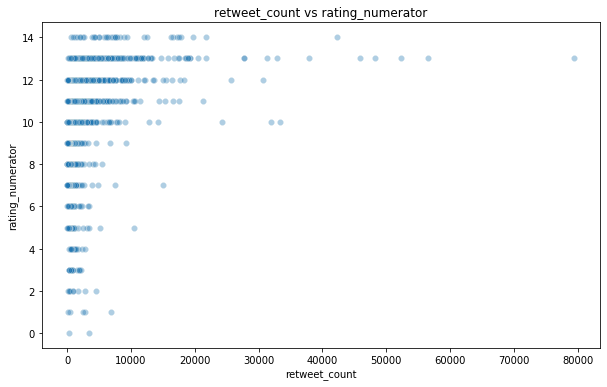

In [280]:
# make scatterplot between 'retweet_count' and 'rating_numerator'
plt.figure(figsize = (10,6))
import seaborn as sns
sns.scatterplot(data_new['retweet_count'],data_new[data_new['rating_numerator'] < 20]['rating_numerator'],alpha = 0.1)
plt.title('retweet_count vs rating_numerator')

### Insight 1: Pictures who has high retweet counts have high rating numerator.

### Insight 2: Picture who has highest numerator are not the one who has highest retweet counts.

In [283]:
print(data_new['prediction'].value_counts())
data_hist = data_new[data_new['prediction'] != 'not a dog']

not a dog                         1232
golden_retriever                   628
Labrador_retriever                 432
Pembroke                           380
Chihuahua                          364
pug                                248
toy_poodle                         204
chow                               192
Samoyed                            168
Pomeranian                         168
malamute                           132
Chesapeake_Bay_retriever           124
French_bulldog                     124
cocker_spaniel                     120
miniature_pinscher                 100
Eskimo_dog                          88
Cardigan                            84
German_shepherd                     84
Staffordshire_bullterrier           84
beagle                              80
Siberian_husky                      80
Shih-Tzu                            80
Rottweiler                          76
Shetland_sheepdog                   76
Maltese_dog                         76
kuvasz                   

In [296]:
data_hist['prediction'].value_counts().head(20).index

Index(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'toy_poodle', 'chow', 'Samoyed', 'Pomeranian', 'malamute',
       'Chesapeake_Bay_retriever', 'French_bulldog', 'cocker_spaniel',
       'miniature_pinscher', 'Eskimo_dog', 'German_shepherd', 'Cardigan',
       'Staffordshire_bullterrier', 'beagle', 'Siberian_husky'],
      dtype='object')

Text(0.5, 0, 'dog_type')

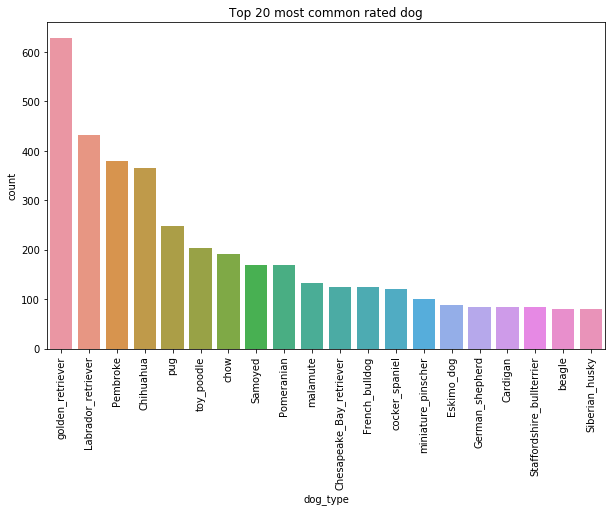

In [315]:
plt.figure(figsize = (10,6))
sns.barplot(data_hist['prediction'].value_counts().head(20).index,data_hist['prediction'].value_counts().head(20))
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Top 20 most common rated dog')
plt.xlabel('dog_type')

### Insight 3: Golden retriever is the most common rated dog

Text(0.5, 0, 'dog_type')

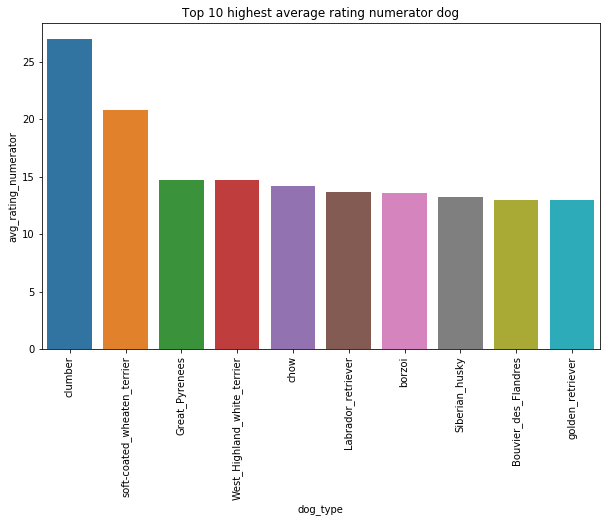

In [314]:
plt.figure(figsize = (10,6))
data_hist.groupby('prediction')['rating_numerator'].mean().sort_values(ascending = False)
sns.barplot(data_hist.groupby('prediction')['rating_numerator'].mean().sort_values(ascending = False).head(10).index,
            data_hist.groupby('prediction')['rating_numerator'].mean().sort_values(ascending = False).head(10))
plt.xticks(rotation = 90)
plt.ylabel('avg_rating_numerator')
plt.title('Top 10 highest average rating numerator dog')
plt.xlabel('dog_type')

### Insight 4 : Clumber has the highest average rating numerator